<a href="https://colab.research.google.com/github/Pratyush0210/house_price_prediction_unmessenger/blob/main/house_price_prediction_unmessenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unmessenger**
# **Assignment 7**
## **Pratyush Kumar Garg**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(18, 18)})

In [204]:
df = pd.read_csv("/content/drive/MyDrive/python data science/Pandas /Unmessenger Assignment 7 & 8/data.csv", parse_dates=['date'])

In [205]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [206]:
df.shape

(4600, 18)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

# **Data Preprocessing**

In [208]:
df['date'] = pd.to_datetime(df['date'])

In [209]:
df['price']     = df['price'].astype('int64')
df['bedrooms']  = df['bedrooms'].astype('int64')
df['floors']    = df['floors'].astype('int64')
df['street']    = df['street'].astype('string')
df['city']      = df['city'].astype('string')
df['statezip']  = df['statezip'].astype('string')
df['country']   = df['country'].astype('string')

In [210]:
df.insert(1, "year", df.date.dt.year)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   year           4600 non-null   int64         
 2   price          4600 non-null   int64         
 3   bedrooms       4600 non-null   int64         
 4   bathrooms      4600 non-null   float64       
 5   sqft_living    4600 non-null   int64         
 6   sqft_lot       4600 non-null   int64         
 7   floors         4600 non-null   int64         
 8   waterfront     4600 non-null   int64         
 9   view           4600 non-null   int64         
 10  condition      4600 non-null   int64         
 11  sqft_above     4600 non-null   int64         
 12  sqft_basement  4600 non-null   int64         
 13  yr_built       4600 non-null   int64         
 14  yr_renovated   4600 non-null   int64         
 15  street         4600 n

In [212]:
df.drop_duplicates()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,2014,534333,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,2014,416904,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2014,203400,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### **Removing rows having price = 0**

In [213]:
(df.price == 0).sum()

49

In [214]:
df['price'].replace(0, np.nan, inplace = True)
df.dropna(inplace=True)

In [215]:
df.shape

(4551, 19)

In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4551.00,2014.00,0.00,2014.00,2014.00,2014.00,2014.00,2014.00
price,4551.00,557905.89,563929.87,7800.00,326264.00,465000.00,657500.00,26590000.00
bedrooms,4551.00,3.39,0.90,0.00,3.00,3.00,4.00,9.00
bathrooms,4551.00,2.16,0.78,0.00,1.75,2.25,2.50,8.00
sqft_living,4551.00,2132.37,955.95,370.00,1460.00,1970.00,2610.00,13540.00
sqft_lot,4551.00,14835.28,35964.08,638.00,5000.00,7680.00,10978.00,1074218.00
floors,4551.00,1.46,0.55,1.00,1.00,1.00,2.00,3.00
waterfront,4551.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
view,4551.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,4551.00,3.45,0.68,1.00,3.00,3.00,4.00,5.00


In [217]:
df.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.00,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.00,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.00,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.00,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.00,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [218]:
df.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [219]:
df.head(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.00,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.00,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.00,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.00,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.00,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [220]:
df.nunique(axis = 0)

date               70
year                1
price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

### **Adding new column Age of housing**

In [221]:
df['age'] = df['year'] - df['yr_built']

### **How price is Distributed**

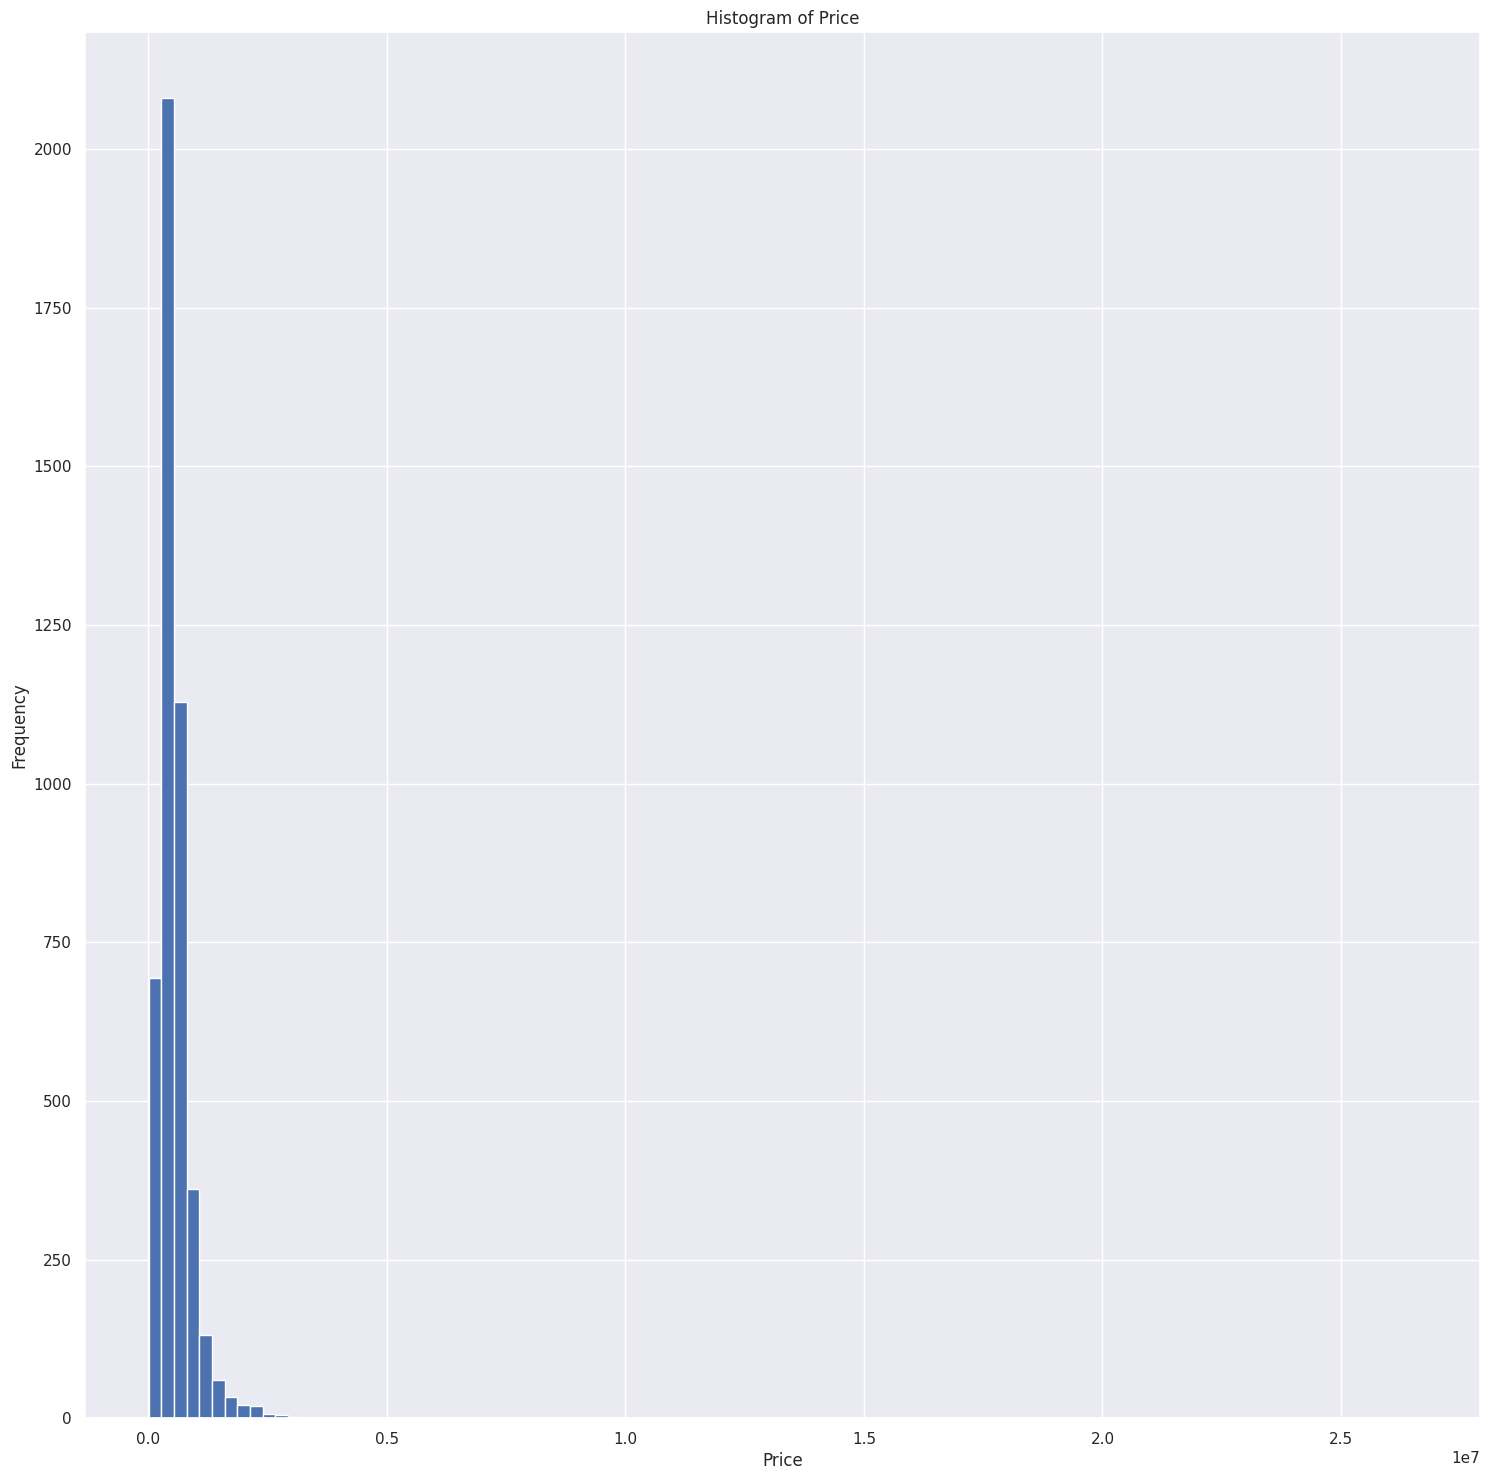

In [222]:
df['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()


### **Removing rows based on outliers, from the plot**

In [223]:
(df['price'] > 0.3e7).sum()

9

In [224]:
df = df[~(df['price'] > 0.3e7)]

### **Distribution of Price after removing outlier**

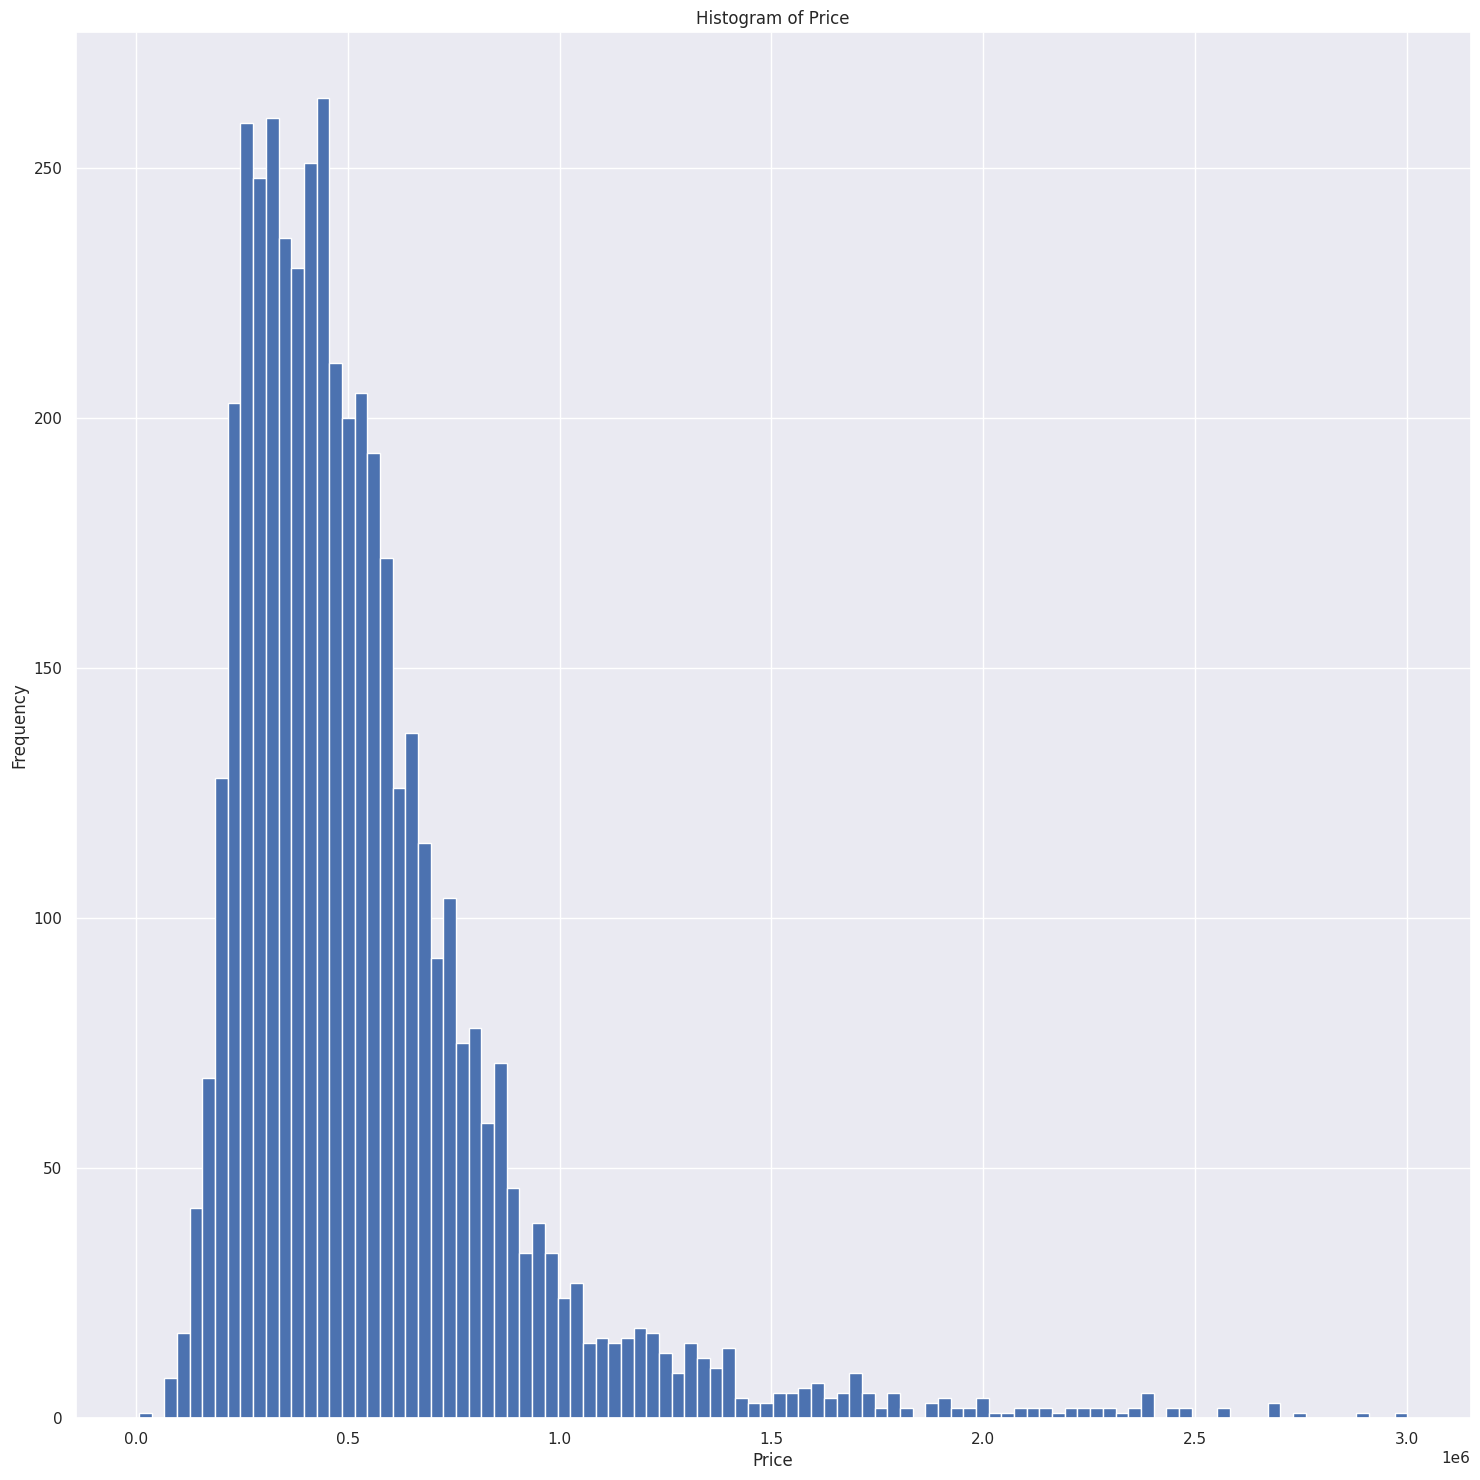

In [225]:
df['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

<Axes: xlabel='price', ylabel='Density'>

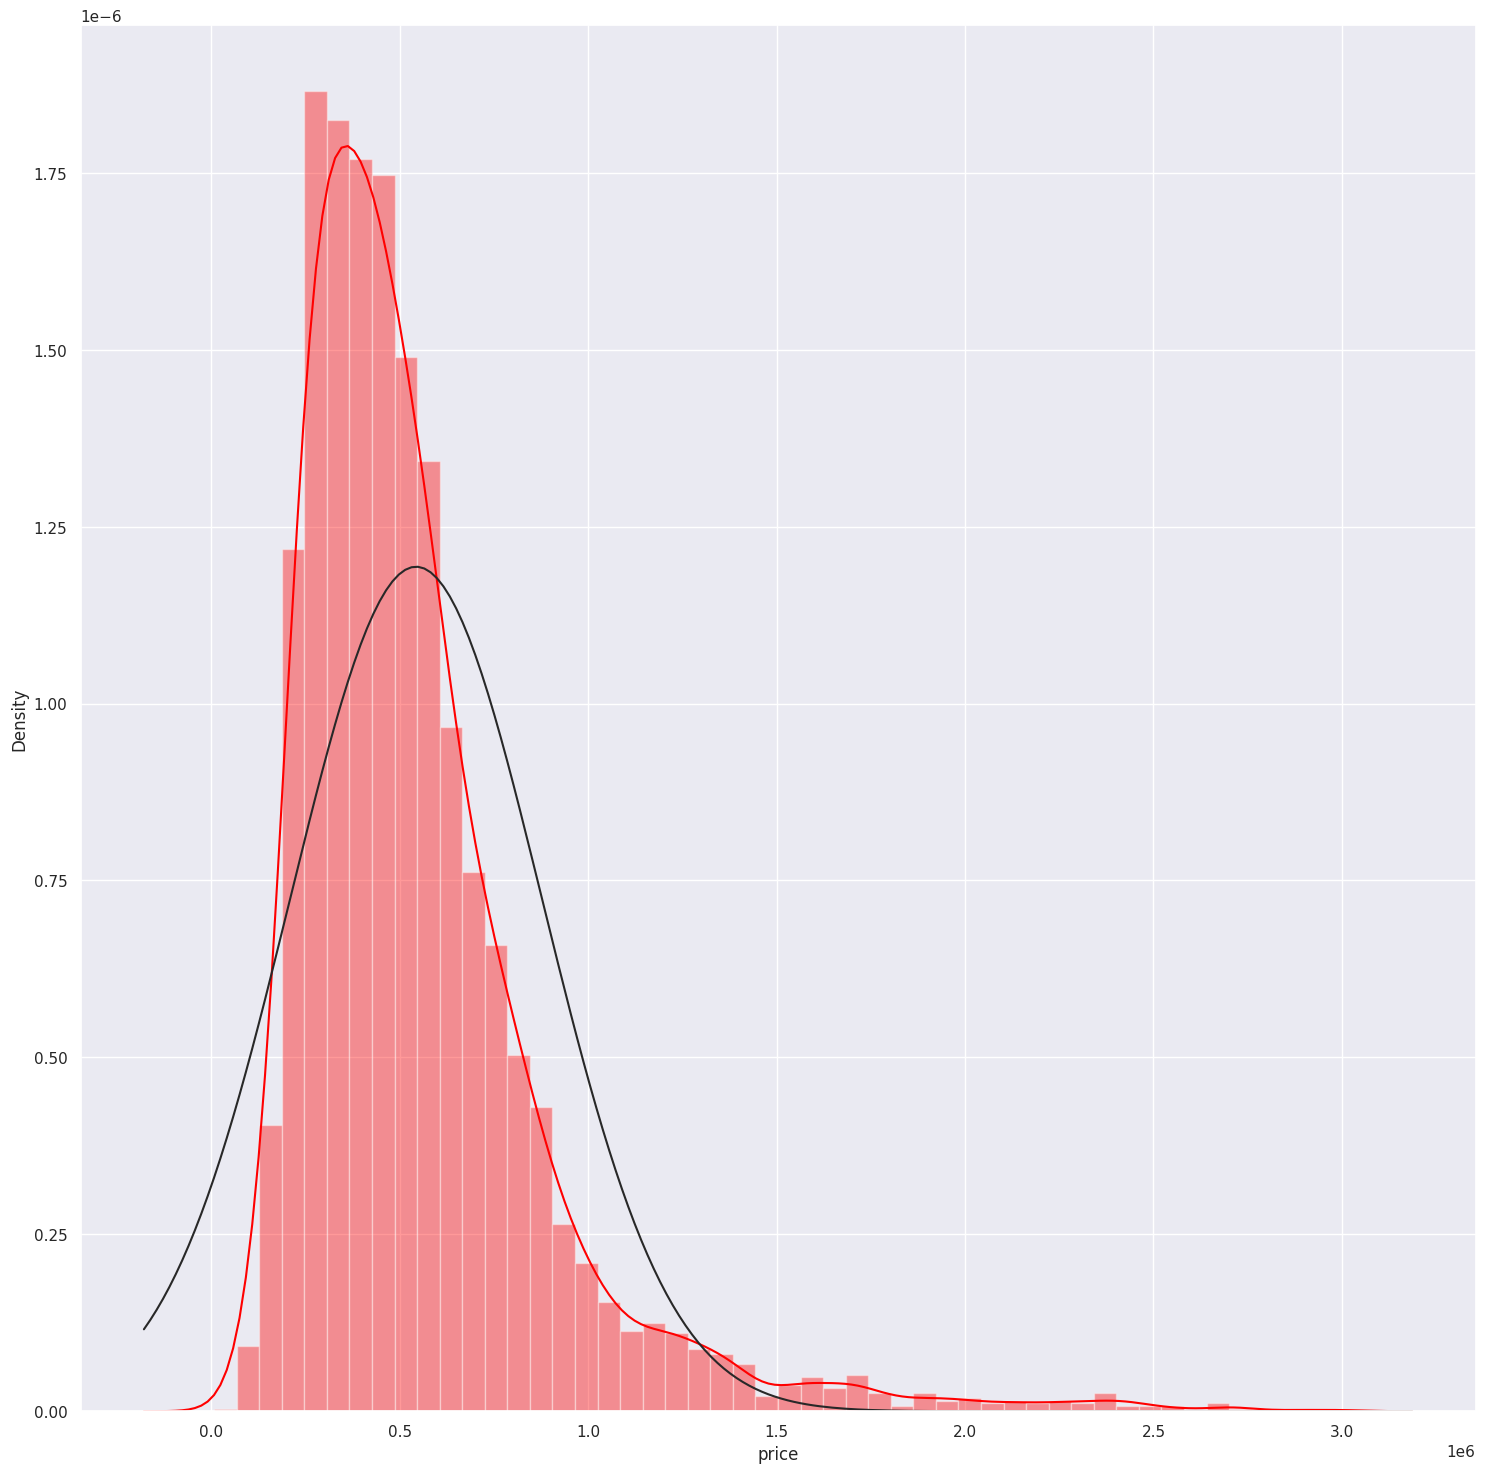

In [226]:
sns.distplot(df['price'],color="red",kde=True,fit=norm)

### **With the help of Q-Q plot we see whether the terget variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.**

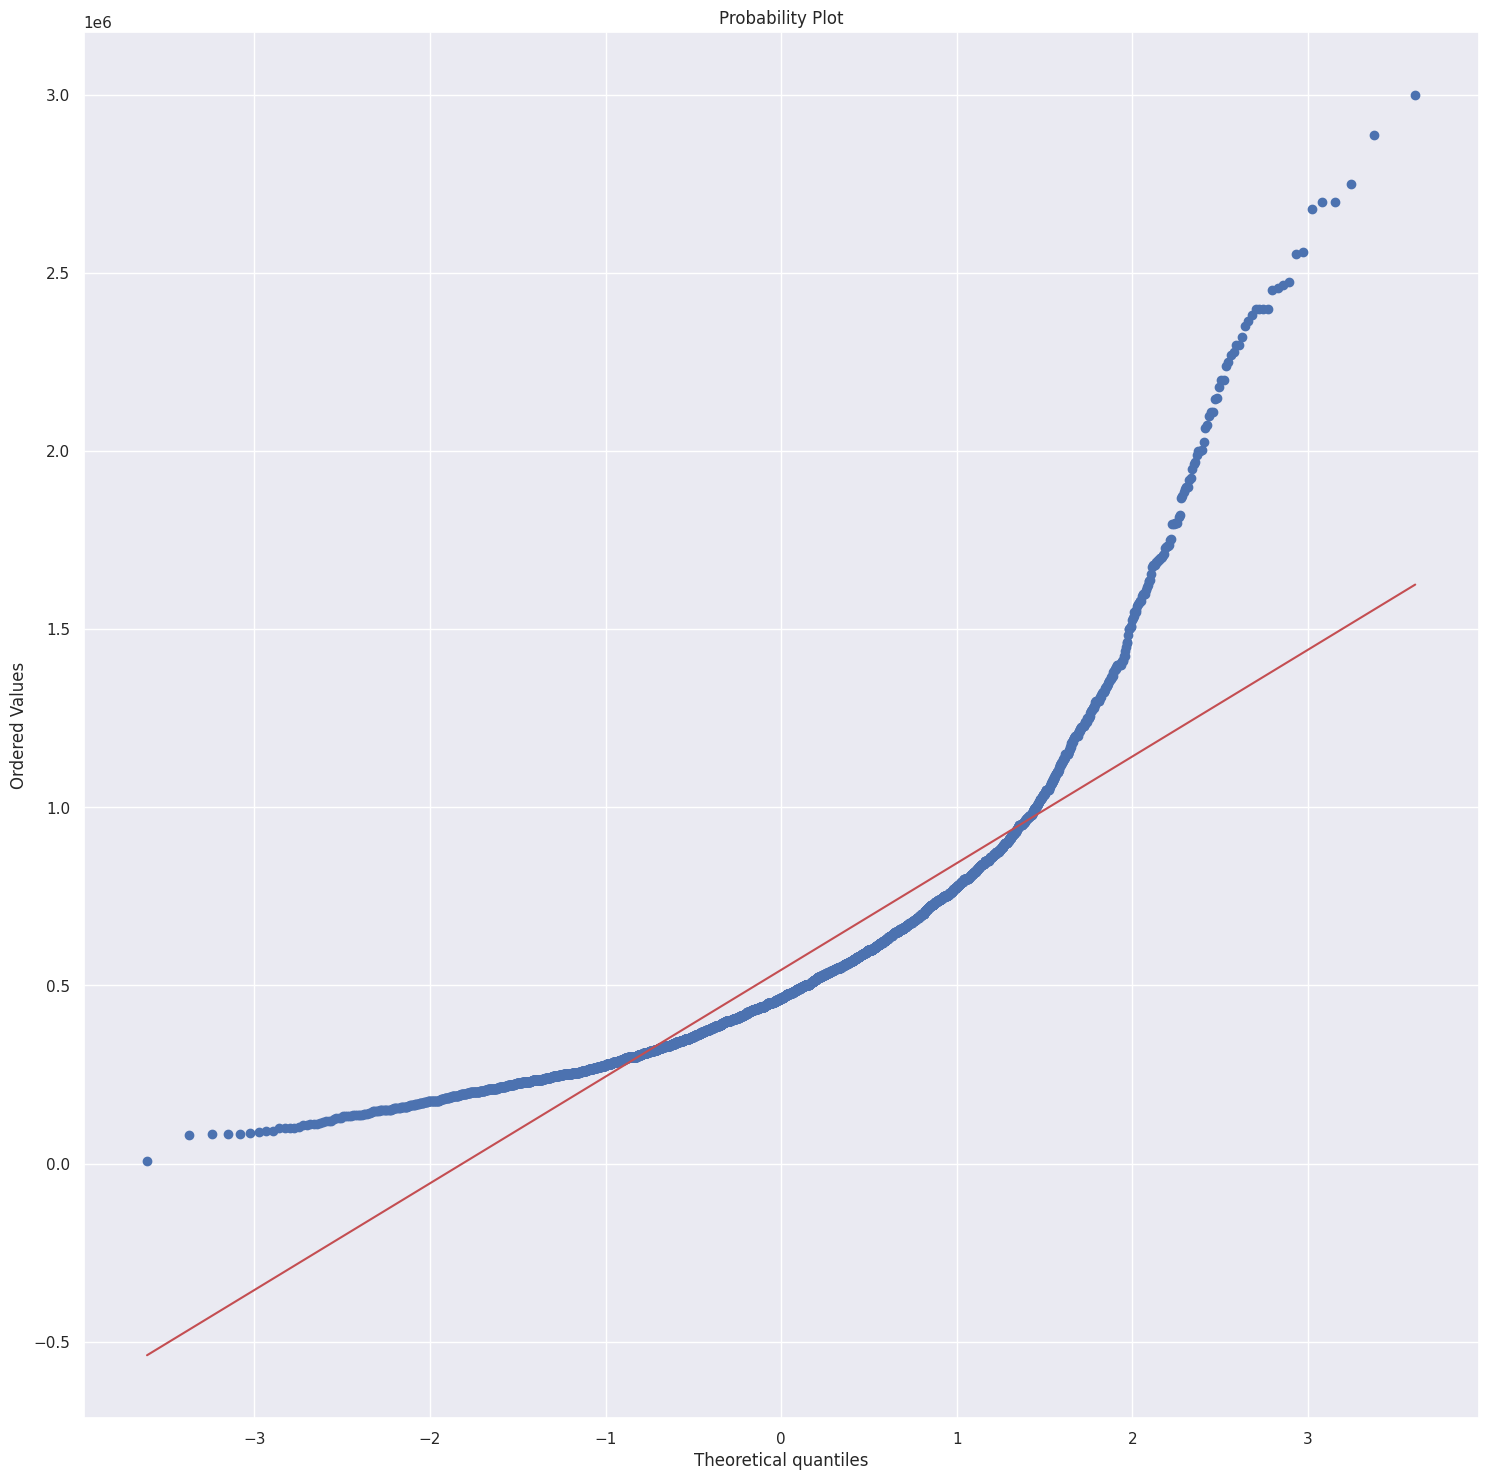

In [227]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

### **As the target variable (price) is very skewed, we apply log-transformation on target varibale to make it Normally Distributed**

In [228]:
df['price'] = np.log1p(df['price'])

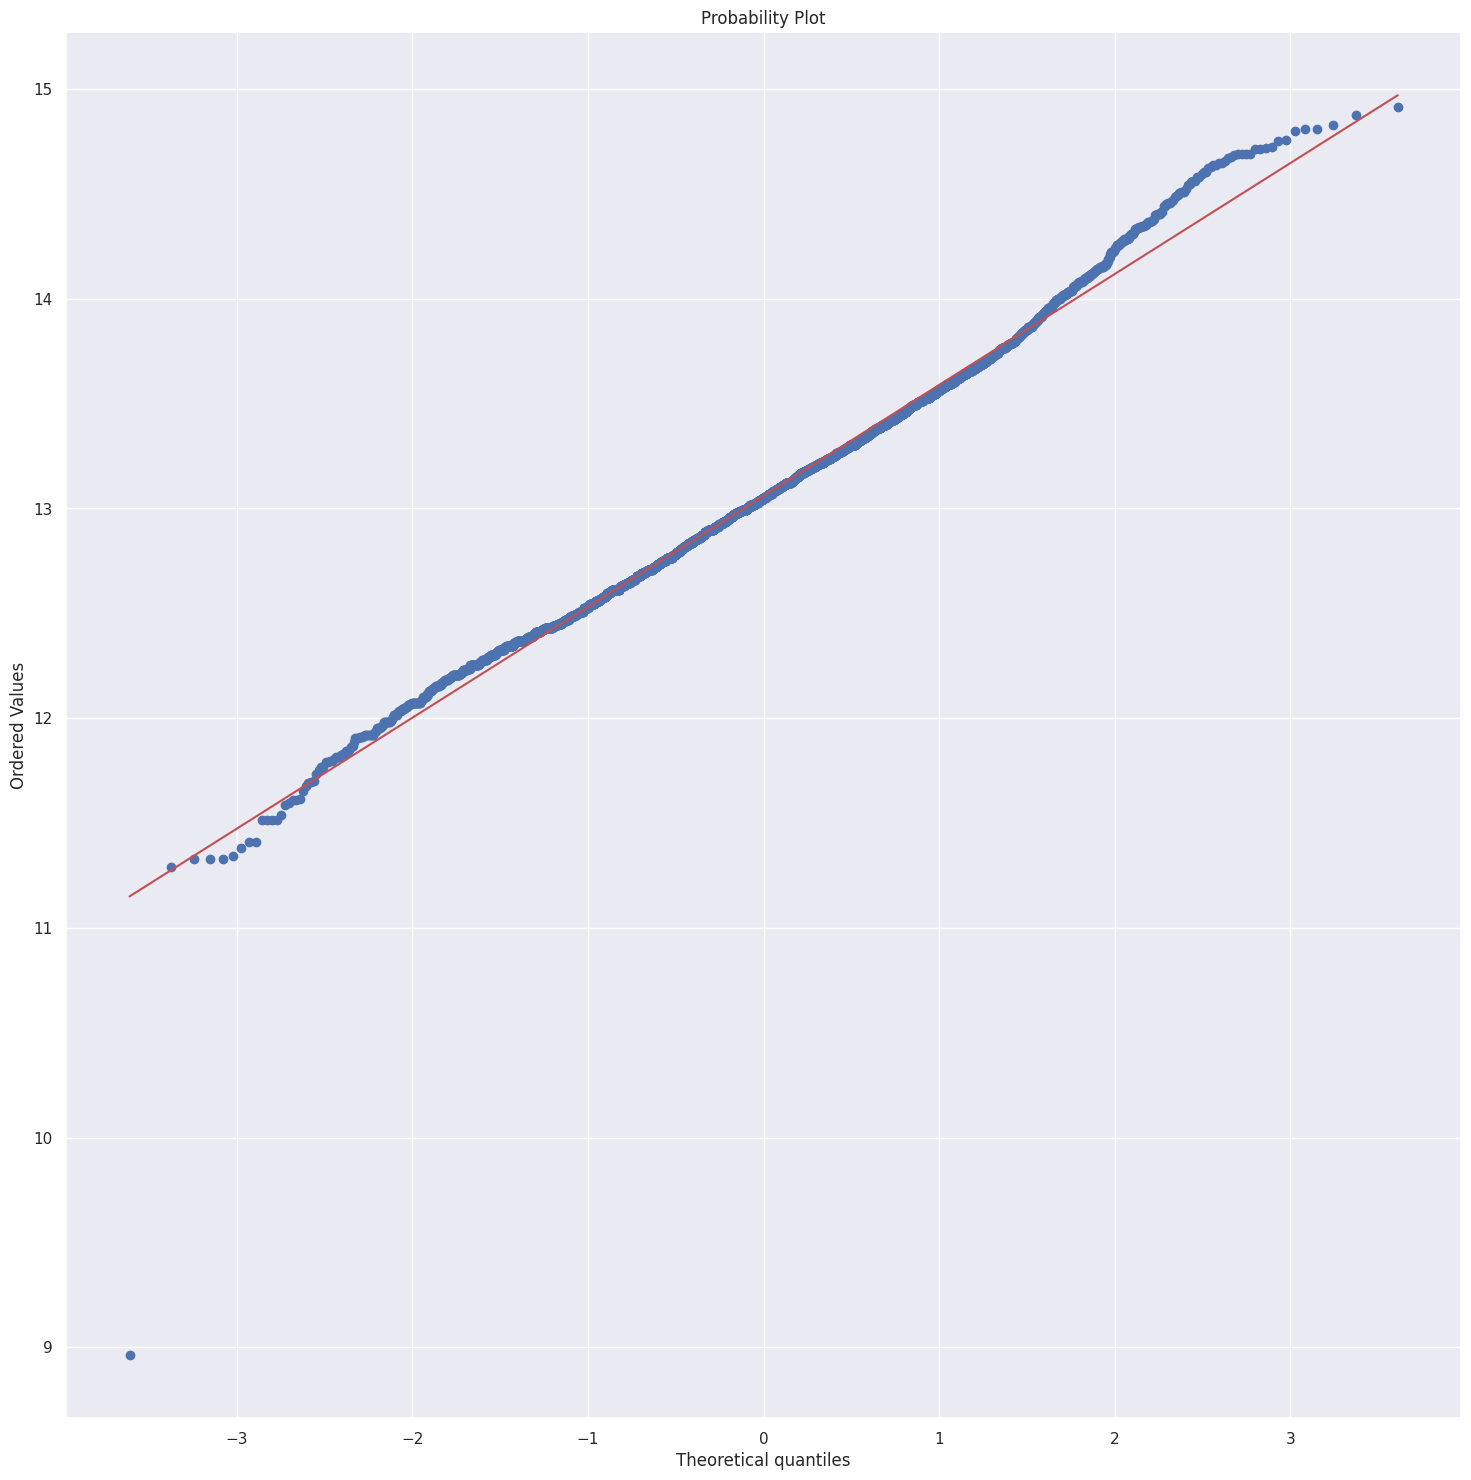

In [229]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

<Axes: xlabel='price', ylabel='Density'>

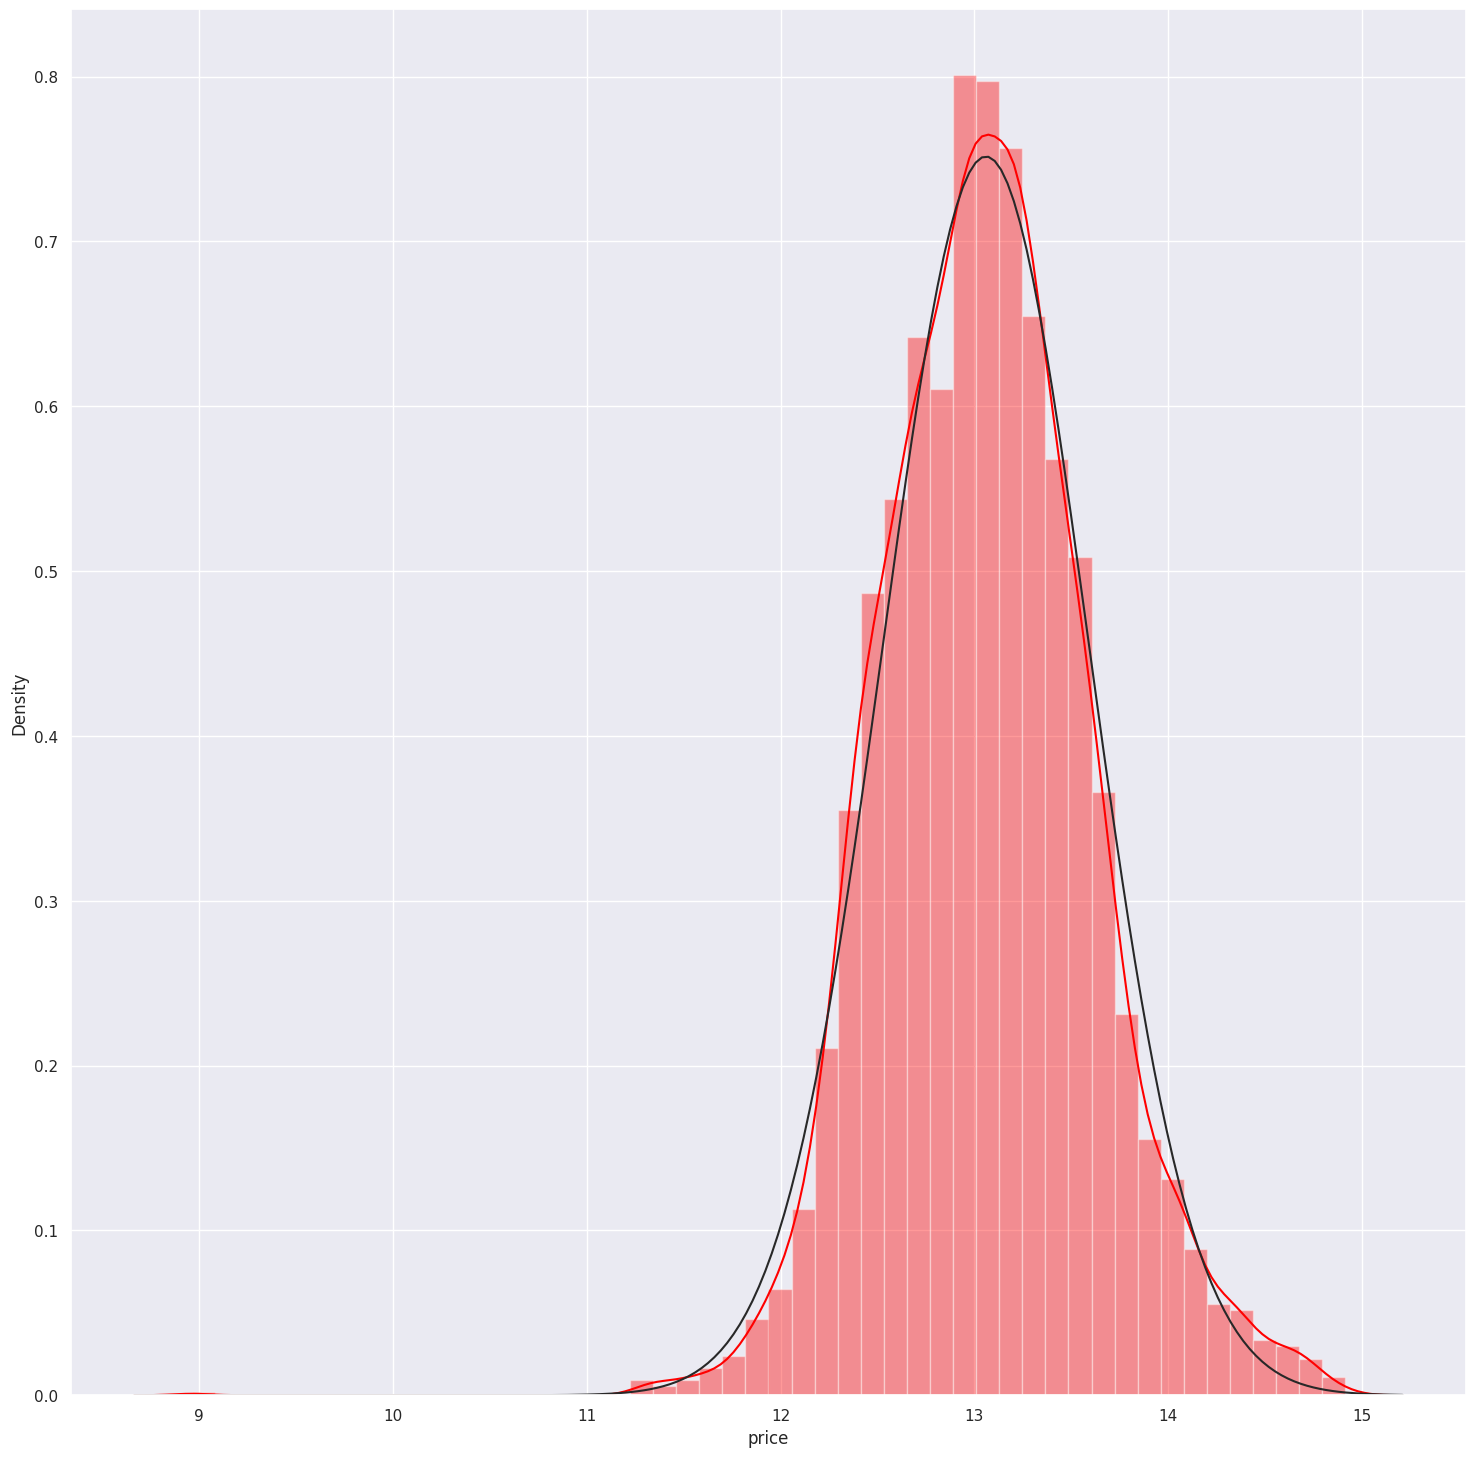

In [230]:
sns.distplot(df['price'],color="red",kde=True,fit=norm)

### **HeatMap for Correlation**

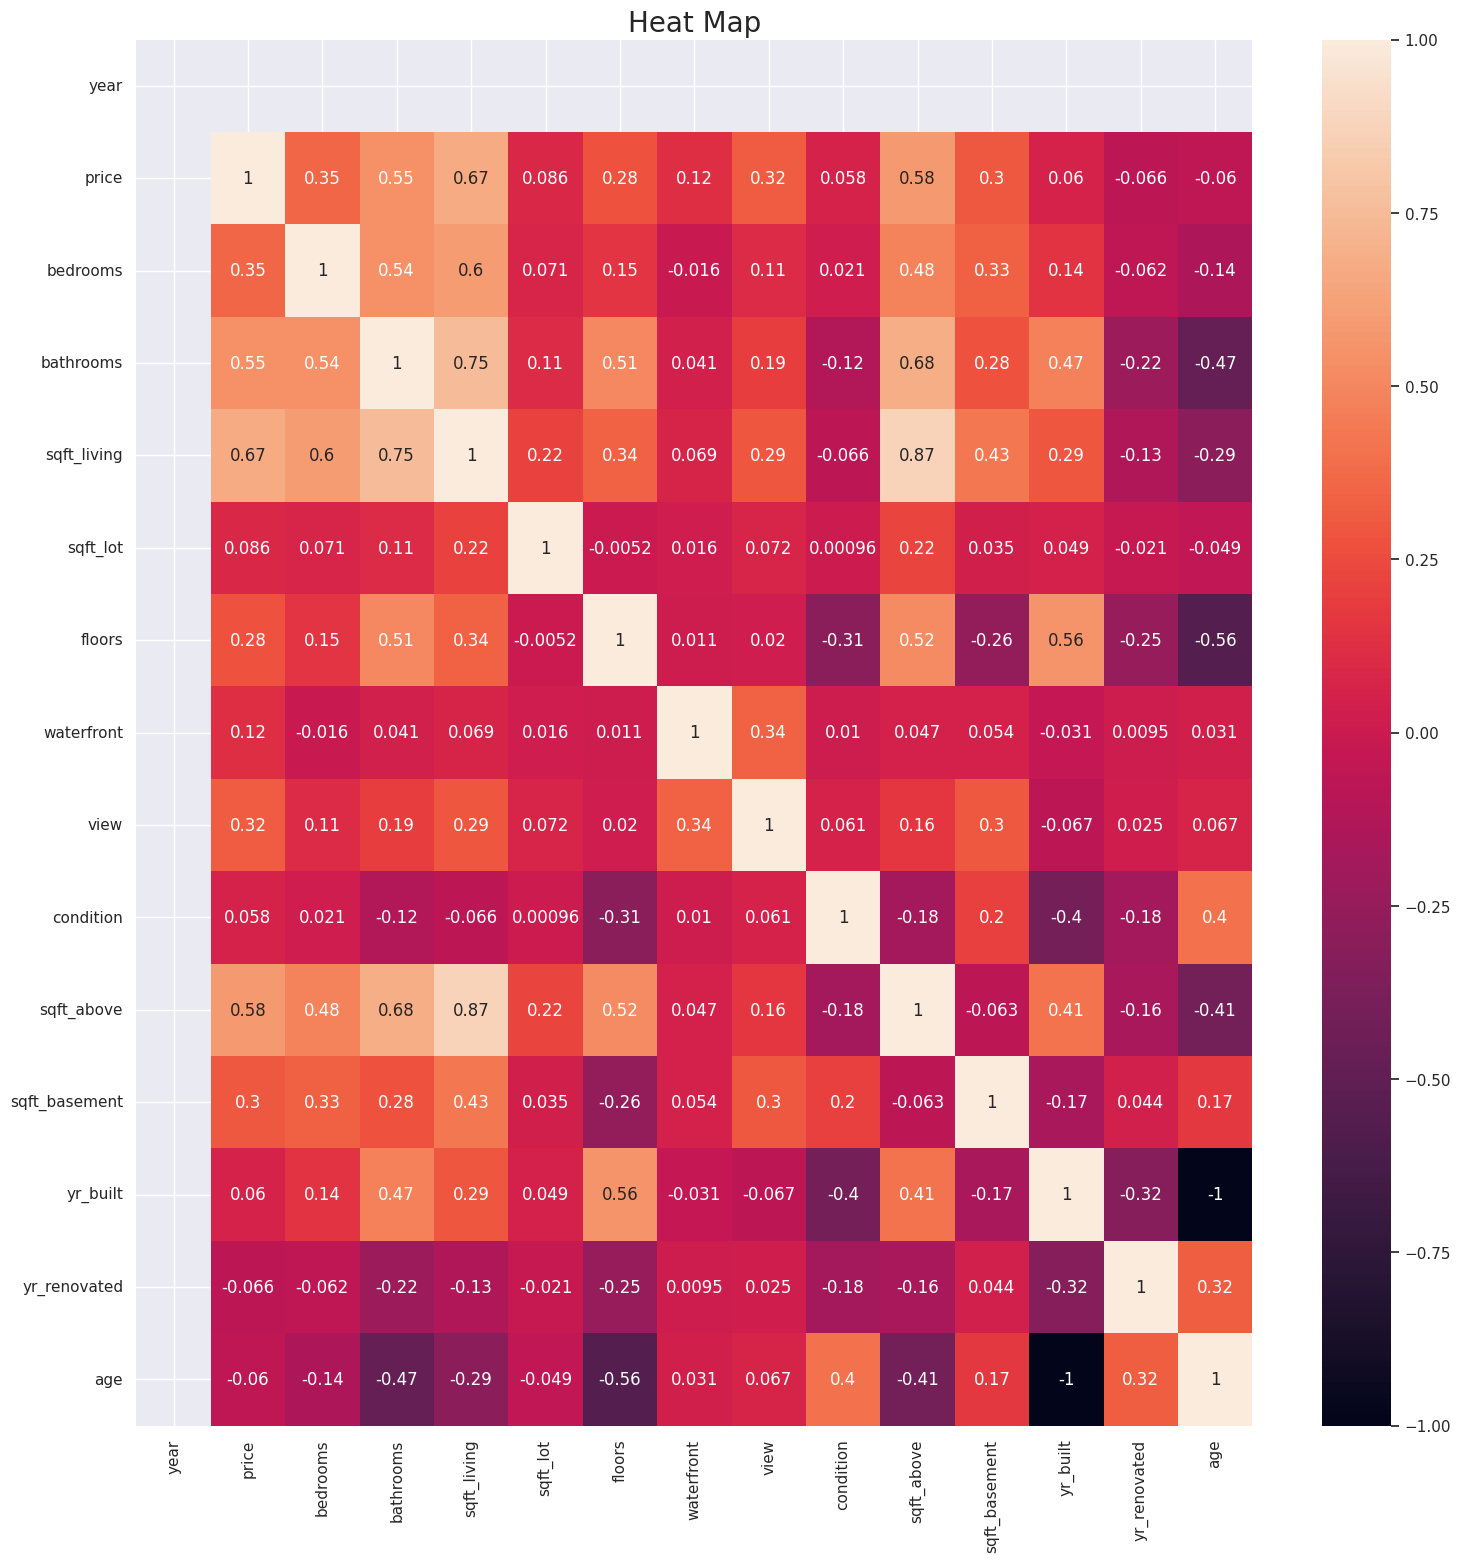

In [231]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

### **Histogram plot of Variables**

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

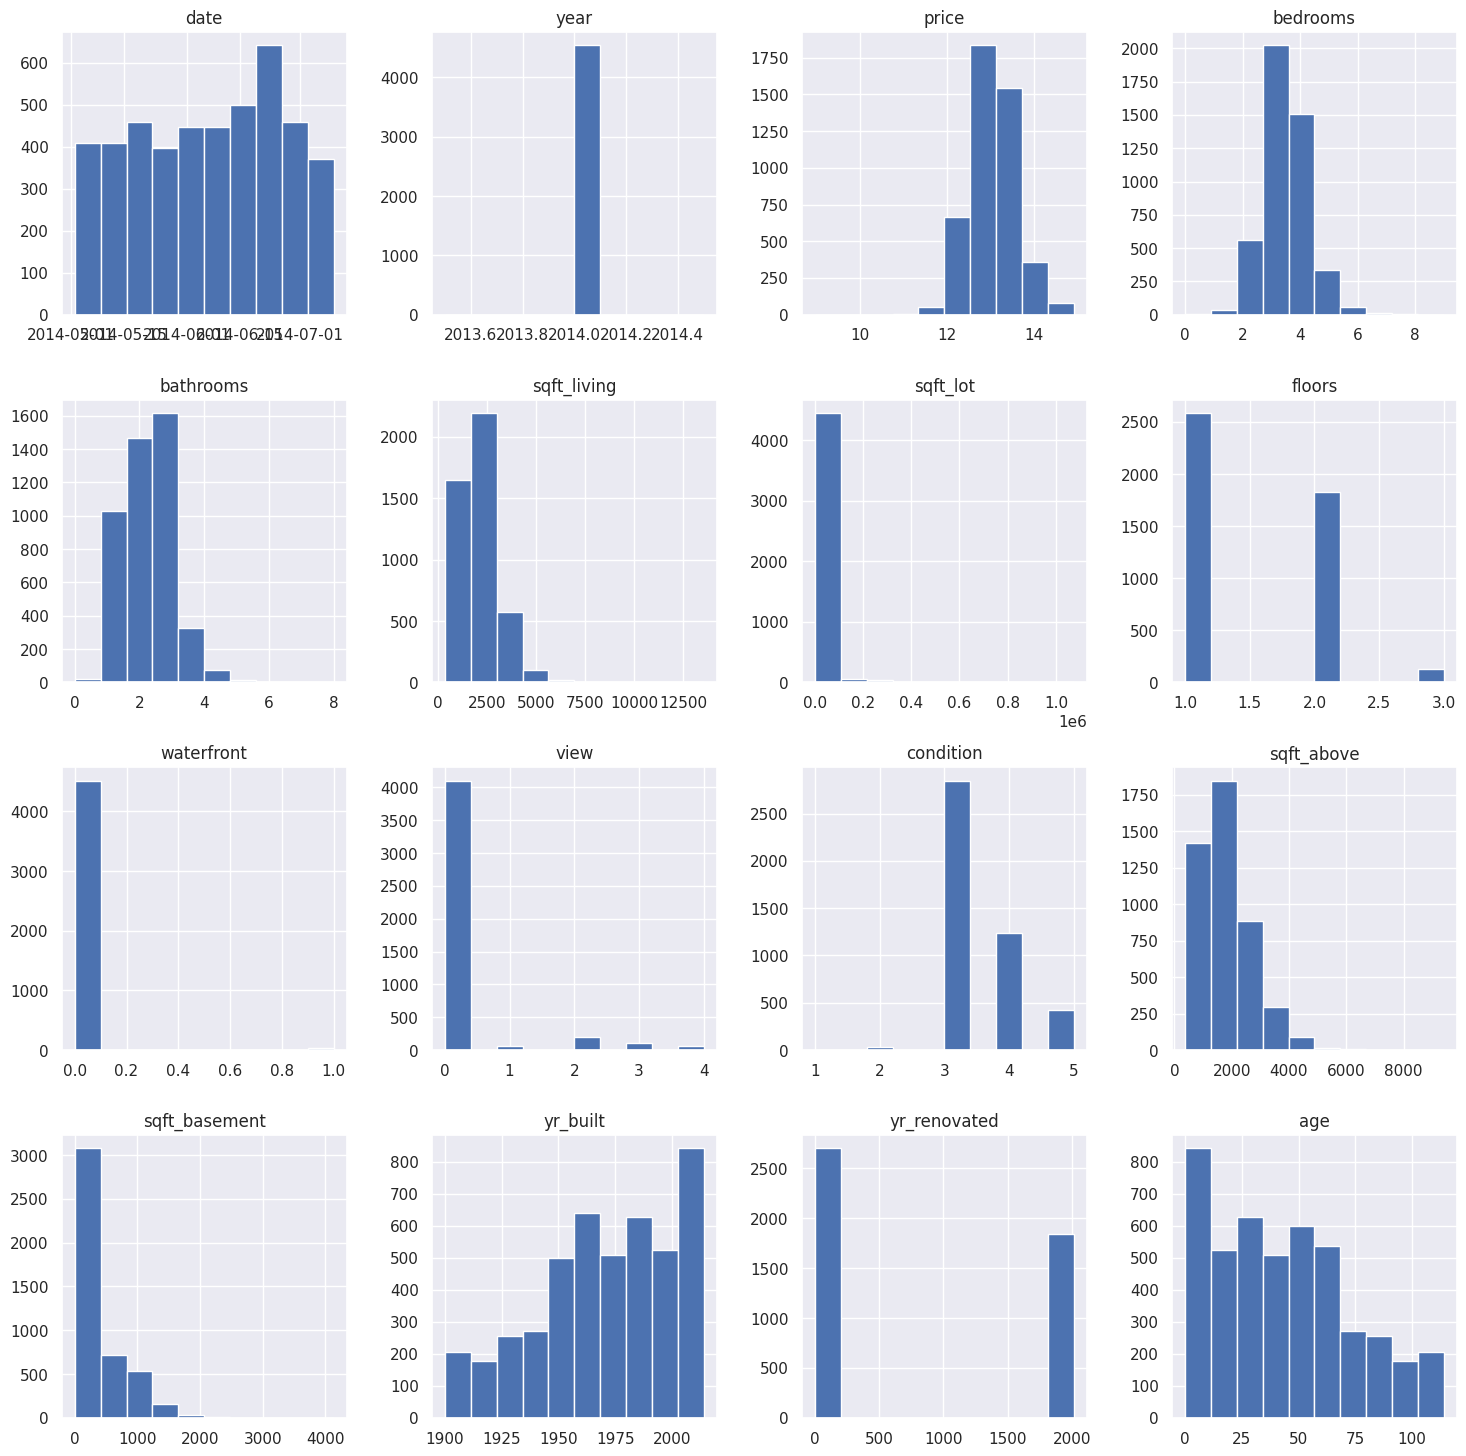

In [232]:
df.hist()

### **Applying One-Hot encoding on City and then reducing Dimension using PCA**

In [233]:
from sklearn.decomposition import PCA
X = pd.get_dummies(df.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['city_pca1'] = X_pca[:, 0]
df['city_pca2'] = X_pca[:, 1]

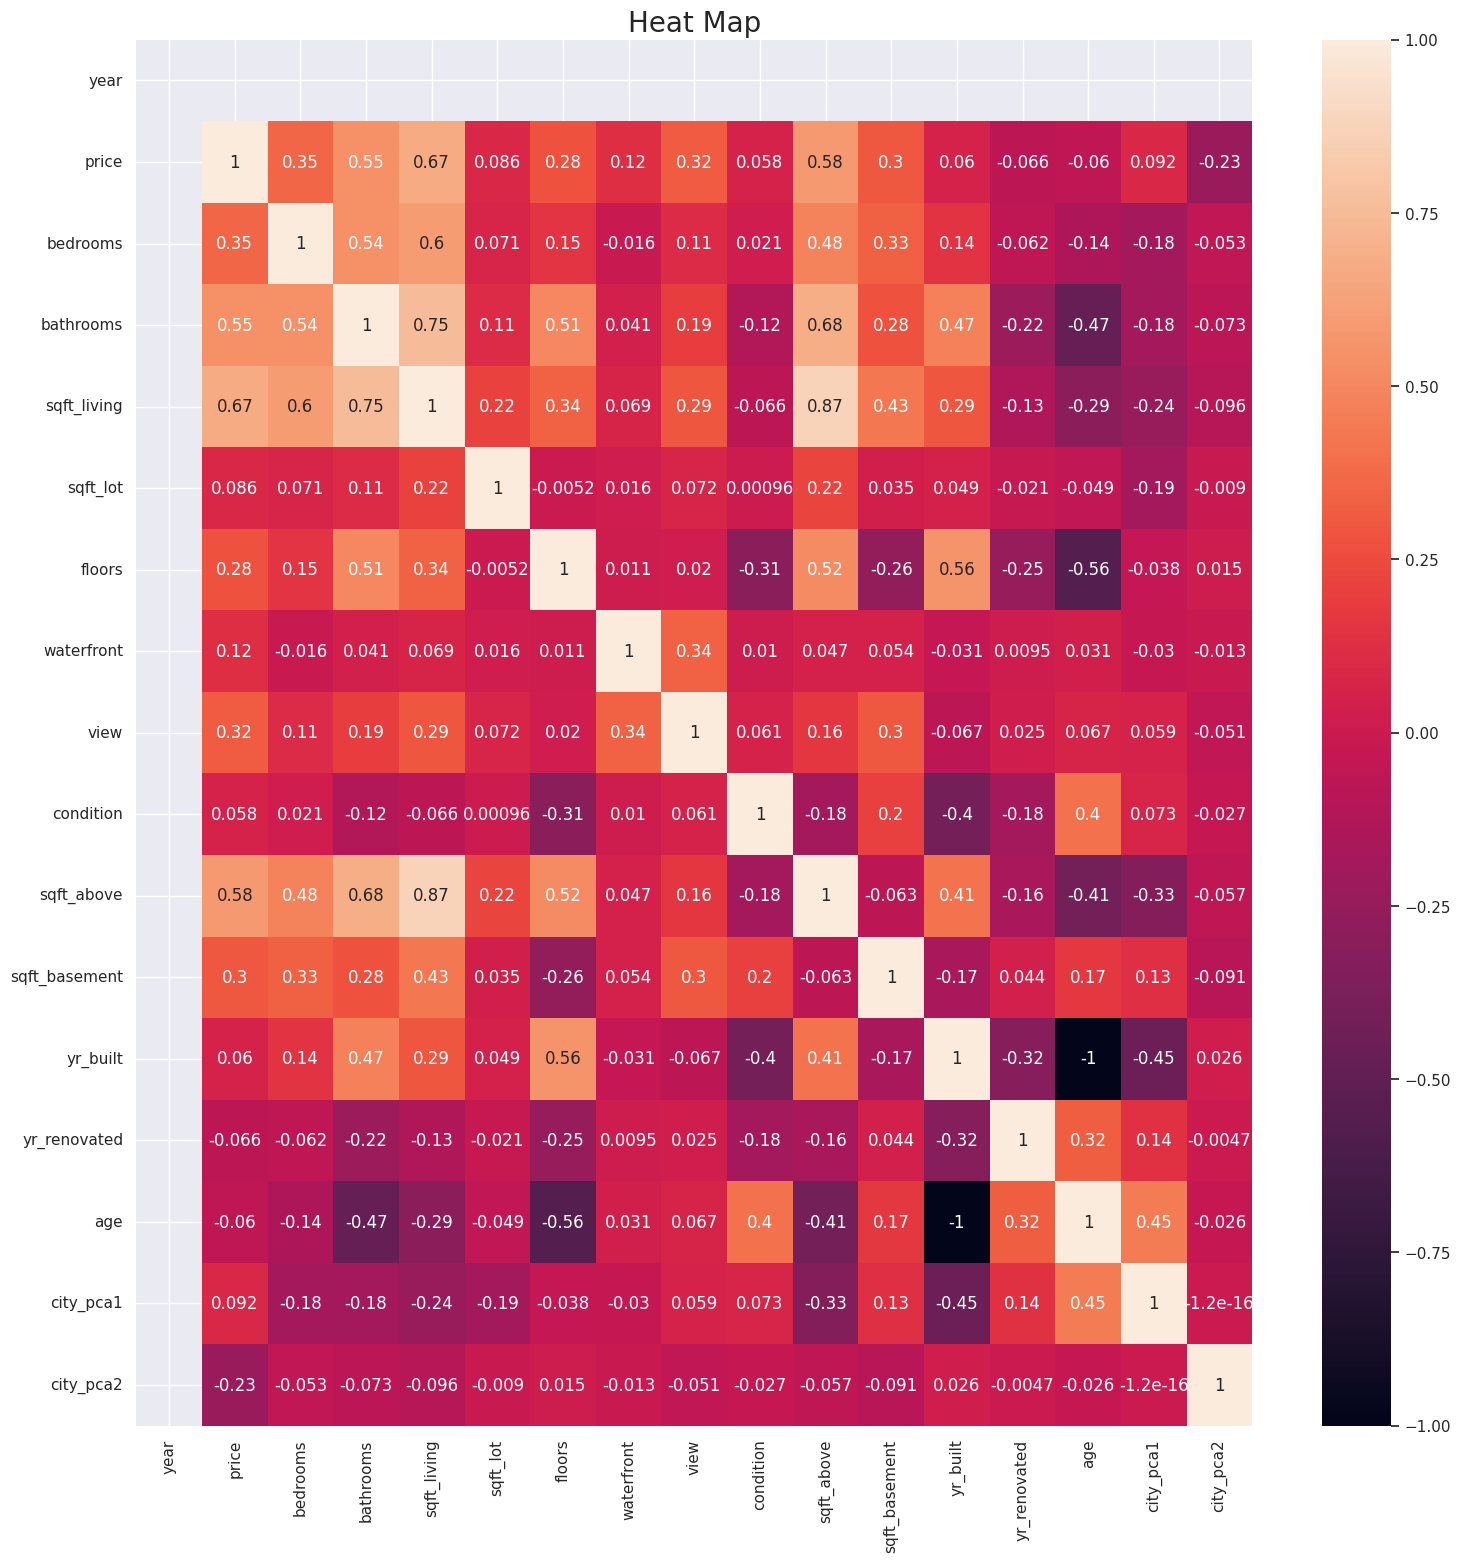

In [234]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [235]:
df.columns

Index(['date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'age', 'city_pca1', 'city_pca2'],
      dtype='object')

### **Dropping unnecessary Variables**

In [236]:
data = df.drop(['date', 'street', 'statezip', 'country','year','city','age'], axis = 1)


In [237]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.65,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.34,-0.02
1,14.68,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.67,0.00
2,12.74,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.36,-0.04
3,12.95,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.40,-0.58
4,13.22,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.38,-0.08


In [238]:
data.shape

(4542, 15)

### **Making Train-Test Split**

In [239]:
x = data.drop("price", axis=1)
y = pd.DataFrame(data["price"])

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

### **Applying StandardScaler on X_Train and X_Test**

In [241]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_train.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,0.68,0.14,0.19,-0.25,0.99,-0.08,-0.30,0.83,0.37,-0.30,-0.44,1.20,1.41,0.03
1,0.68,-0.19,-0.04,-0.03,-0.84,-0.08,-0.30,-0.66,-0.93,1.64,-0.71,1.23,1.41,0.03
2,0.68,0.47,0.04,-0.20,0.99,-0.08,-0.30,-0.66,0.41,-0.67,1.15,-0.82,-0.82,3.26
3,0.68,0.47,1.14,-0.20,0.99,-0.08,-0.30,-0.66,1.62,-0.67,1.18,-0.82,-0.82,3.26
4,0.68,-1.51,-0.28,-0.27,-0.84,-0.08,-0.30,-3.65,0.06,-0.67,-2.36,-0.82,1.41,0.03
5,0.68,0.47,0.27,-0.13,-0.84,-0.08,3.69,-0.66,0.20,0.17,0.20,1.23,1.41,0.03
6,0.68,0.14,-0.32,-0.17,-0.84,-0.08,-0.30,0.83,-0.59,0.44,-1.38,-0.82,1.41,0.03
7,-1.54,-1.51,-1.40,-0.31,-0.84,-0.08,2.36,0.83,-1.17,-0.67,-1.58,-0.82,1.41,0.03
8,-0.43,-0.52,-0.45,-0.17,-0.84,-0.08,-0.30,-0.66,-0.70,0.37,0.20,1.23,1.41,0.03
9,1.80,3.10,1.86,-0.18,0.99,-0.08,-0.30,-0.66,2.41,-0.67,1.25,-0.82,-0.71,-0.13


In [242]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)
X_test.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,0.68,1.78,1.80,-0.26,0.99,-0.08,-0.30,-0.66,1.27,1.33,1.45,-0.82,1.41,0.03
1,-0.43,-0.19,0.45,-0.25,-0.84,-0.08,-0.30,0.83,-0.48,1.80,-2.19,1.21,1.41,0.03
2,-0.43,-0.52,-0.97,-0.19,-0.84,-0.08,-0.30,-0.66,-0.70,-0.67,0.54,1.22,-0.72,-0.15
3,1.80,0.47,0.61,0.06,-0.84,-0.08,-0.30,0.83,-0.23,1.66,-1.72,-0.82,1.41,0.03
4,0.68,-0.19,0.19,-0.09,-0.84,-0.08,-0.30,0.83,0.58,-0.67,-0.54,1.23,-0.81,-2.31
5,0.68,0.47,0.04,0.64,0.99,-0.08,-0.30,-0.66,0.41,-0.67,0.68,-0.82,-0.72,-0.14
6,-0.43,-0.85,-0.09,-0.16,-0.84,-0.08,-0.30,-0.66,-0.58,0.88,-0.27,1.23,1.41,0.03
7,0.68,0.47,1.18,-0.18,0.99,-0.08,-0.30,-0.66,1.66,-0.67,1.18,-0.82,-0.66,-0.07
8,-0.43,-0.19,-0.21,-0.18,-0.84,-0.08,-0.30,0.83,-0.36,0.24,-0.06,-0.82,-0.69,-0.10
9,-0.43,1.45,-0.53,-0.36,2.81,-0.08,-0.30,-0.66,-0.22,-0.67,1.22,-0.82,1.41,0.03


In [243]:
X_train.shape

(3633, 14)

# **Linear Regression**

In [244]:
lr = LinearRegression()
lr.fit(X_train, Y_train).score(X_test, Y_test)

0.5348345336876039

In [245]:
Y_pred = lr.predict(X_test)

In [246]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.3569322543764362


# **Ridge Regression**

In [247]:
rg = Ridge()
rg.fit(X_train, Y_train).score(X_test, Y_test)

0.5349233367583918

In [248]:
Y_pred = rg.predict(X_test)

In [249]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.3568981824219741


# **Kernel_Ridge Regression**

In [250]:
ridge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [251]:
ridge.fit(X_train, Y_train).score(X_test, Y_test)

0.5459632544819448

In [252]:
Y_pred = ridge.predict(X_test)

In [253]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.3526367443368176


# **LGBM Regression**

In [254]:
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [255]:
lgb.fit(X_train, Y_train).score(X_test, Y_test)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


0.7252517263993128

In [256]:
Y_pred = lgb.predict(X_test)

In [257]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.2743149950560627


# **XGBoost Regressor**

In [258]:
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [259]:
xgb.fit(X_train, Y_train).score(X_test, Y_test)

0.7232977508869802

In [260]:
Y_pred = xgb.predict(X_test)

In [261]:
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE :  0.2752887139260546
